In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [37]:
df = pd.read_csv('otliers_removed_from_gurgaonProperties.csv')

In [38]:
df.head()

,property_type,society,sector,price_in_crores,price_per_sqft,area_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super Built up area,Built Up area,Carpet area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score,area_room_ratio
0,flat,maa bhagwati residency,sector 7,0.45,5000.000000,900.0,Carpet area: 900 (83.61 sq.m.),2.0,2.0,1,4.0,West,Relatively New,NaN,NaN,900.0,0,0,0,0,0,1,28,450.0
1,flat,apna enclave,sector 3,0.50,7692.307692,650.0,Carpet area: 650 (60.39 sq.m.),2.0,2.0,1,1.0,West,Old Property,NaN,NaN,650.0,0,0,0,0,0,0,37,325.0
2,flat,tulsiani easy in homes,sohna road,0.40,6722.689076,595.0,Carpet area: 595 (55.28 sq.m.),2.0,2.0,3,12.0,not available,New Property,NaN,NaN,595.0,0,0,0,0,0,1,36,297.5
3,flat,smart world orchard,sector 61,1.47,12250.000000,1200.0,Carpet area: 1200 (111.48 sq.m.),2.0,2.0,2,2.0,not available,Undefined,NaN,NaN,1200.0,0,0,0,0,0,1,76,600.0
4,flat,parkwood westend,sector 92,0.70,5204.460967,1345.0,Super Built up area 1345(124.95 sq.m.),2.0,2.0,3,5.0,not available,Under Construction,1345.0,NaN,NaN,0,0,0,0,0,1,0,672.5


In [39]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price_in_crores           0
price_per_sqft            0
area_sqft                 0
areaWithType            749
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                  227
agePossession             0
Super Built up area    1678
Built Up area          1923
Carpet area            1854
study room                0
store room                0
Pooja Room                0
servant room              0
Others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [40]:
## Built up area

<Axes: xlabel='Built Up area', ylabel='Super Built up area'>

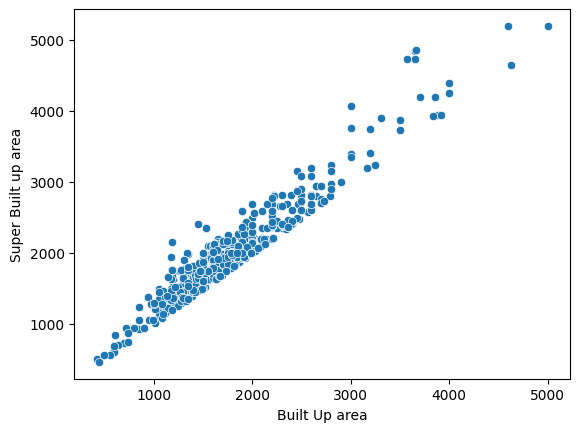

In [41]:
sns.scatterplot(x=df['Built Up area'], y=df['Super Built up area'])

<Axes: xlabel='Built Up area', ylabel='Carpet area'>

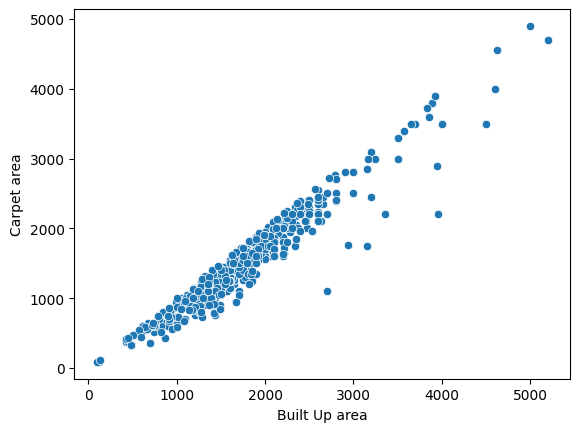

In [42]:
sns.scatterplot(x=df['Built Up area'],y=df['Carpet area'])

In [43]:
(df['Super Built up area'].isnull() & df['Built Up area'].isnull())&(df['Carpet area'].isnull())

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [44]:
all_present_df = df[~(df['Super Built up area'].isnull()|df['Built Up area'].isnull()|df['Carpet area'].isnull())]

In [45]:
all_present_df.head()

,property_type,society,sector,price_in_crores,price_per_sqft,area_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super Built up area,Built Up area,Carpet area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score,area_room_ratio
37,flat,ild greens,sector 37,0.78,5714.285714,1365.0,Super Built up area 1365(126.81 sq.m.)Built Up...,2.0,2.0,3,1.0,North,Moderately Old,1365.0,1068.1,900.0,0,0,0,0,0,0,103,682.500000
99,flat,emaar palm premier,sector 77,2.10,10500.000000,2000.0,Super Built up area 2000(185.81 sq.m.)Built Up...,3.0,4.0,3+,11.0,not available,New Property,2000.0,1600.0,1500.0,0,0,0,0,0,0,129,666.666667
129,flat,umang monsoon breeze,sector 78,0.90,4615.384615,1950.0,Super Built up area 1950(181.16 sq.m.)Built Up...,3.0,3.0,2,1.0,not available,Moderately Old,1950.0,1900.0,1854.0,0,0,1,0,0,1,65,650.000000
132,flat,supertech araville,sector 79,0.90,5882.352941,1530.0,Super Built up area 1530(142.14 sq.m.)Built Up...,2.0,2.0,3,5.0,not available,Relatively New,1530.0,1450.0,1400.0,0,0,0,0,0,1,53,765.000000
137,flat,bhagwati sadan,sector 12,1.15,5750.000000,2000.0,Super Built up area 2500(232.26 sq.m.)Built Up...,3.0,4.0,2,2.0,not available,Old Property,2500.0,2000.0,1750.0,0,0,0,0,1,0,28,666.666667


In [46]:
super_to_built_up_ratio = (all_present_df['Super Built up area']/all_present_df['Built Up area']).median()

In [47]:
carpet_to_built_up_ratio = (all_present_df['Carpet area']/all_present_df['Built Up area']).median()

In [48]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [49]:
# both present built up null
sbc_df = df[~(df['Super Built up area'].isnull()) & (df['Built Up area'].isnull()) & ~(df['Carpet area'].isnull())]

In [50]:
sbc_df.head()

,property_type,society,sector,price_in_crores,price_per_sqft,area_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super Built up area,Built Up area,Carpet area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score,area_room_ratio
30,flat,bhawna cghs,sector 43,3.25,10156.250000,3200.0,Super Built up area 3200(297.29 sq.m.)Carpet a...,4.0,4.0,3+,12.0,not available,Moderately Old,3200.0,NaN,3000.0,0,0,1,0,0,0,119,800.000000
35,flat,chintels paradiso,sector 109,1.80,8866.995074,2030.0,Super Built up area 2030(188.59 sq.m.)Carpet a...,3.0,3.0,2,0.0,East,Moderately Old,2030.0,NaN,1785.0,0,0,0,0,0,1,83,676.666667
36,flat,breez global hill view,sohna road,0.30,5405.405405,555.0,Super Built up area 655(60.85 sq.m.)Carpet are...,2.0,2.0,2,6.0,North-East,New Property,655.0,NaN,555.0,0,0,0,0,0,1,109,277.500000
57,flat,silverglades the melia,sohna road,1.01,6999.306999,1443.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,2.0,2.0,3,12.0,not available,Undefined,1450.0,NaN,950.0,0,0,0,0,0,1,80,721.500000
59,flat,umang winter hills,sector 77,0.99,7857.142857,1260.0,Super Built up area 1260(117.06 sq.m.)Carpet a...,2.0,2.0,2,1.0,North,Relatively New,1260.0,NaN,1000.0,0,0,0,0,0,1,97,630.000000


In [51]:
sbc_df['Built Up area'].fillna(round((sbc_df['Super Built up area']/1.105) + round((sbc_df['Carpet area']/0.9))/2), inplace=True)

C:\Users\deepu\AppData\Local\Temp\ipykernel_46616\1101318668.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['Built Up area'].fillna(round((sbc_df['Super Built up area']/1.105) + round((sbc_df['Carpet area']/0.9))/2), inplace=True)
C:\Users\deepu\AppData\Local\Temp\ipykernel_46616\1101318668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [52]:
df.update(sbc_df)

In [53]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price_in_crores           0
price_per_sqft            0
area_sqft                 0
areaWithType            749
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                  227
agePossession             0
Super Built up area    1678
Built Up area          1502
Carpet area            1854
study room                0
store room                0
Pooja Room                0
servant room              0
Others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [54]:
sb_df = df[~df['Super Built up area'].isnull() & df['Built Up area'].isnull() & df['Carpet area'].isnull()]

In [55]:
sb_df.head()

,property_type,society,sector,price_in_crores,price_per_sqft,area_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super Built up area,Built Up area,Carpet area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score,area_room_ratio
4,flat,parkwood westend,sector 92,0.70,5204.460967,1345.0,Super Built up area 1345(124.95 sq.m.),2.0,2.0,3,5.0,not available,Under Construction,1345.0,NaN,NaN,0,0,0,0,0,1,0,672.5
6,flat,the cocoon,dwarka expressway,2.00,13333.333333,1500.0,Super Built up area 1500(139.35 sq.m.),3.0,3.0,3,5.0,not available,New Property,1500.0,NaN,NaN,0,0,0,0,0,1,0,500.0
13,flat,godrej,sector 33,0.95,6859.205776,1385.0,Super Built up area 1385(128.67 sq.m.),2.0,2.0,3+,3.0,South-East,Under Construction,1385.0,NaN,NaN,0,0,0,0,0,1,0,692.5
14,flat,shree vardhman flora,sector 90,0.70,5384.615385,1300.0,Super Built up area 1300(120.77 sq.m.),2.0,2.0,3,13.0,not available,New Property,1300.0,NaN,NaN,0,0,0,0,0,1,15,650.0
18,flat,central park flower valley,sector 33,2.20,10476.190476,2100.0,Super Built up area 2100(195.1 sq.m.),3.0,3.0,3,12.0,North-East,New Property,2100.0,NaN,NaN,0,0,0,0,0,0,49,700.0


In [56]:
sb_df['Built Up area'].fillna(round(sb_df['Super Built up area']/1.105), inplace=True)

C:\Users\deepu\AppData\Local\Temp\ipykernel_46616\2997303314.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['Built Up area'].fillna(round(sb_df['Super Built up area']/1.105), inplace=True)
C:\Users\deepu\AppData\Local\Temp\ipykernel_46616\2997303314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['Built Up area'].fillna(ro

In [57]:
df.update(sb_df)

In [58]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price_in_crores           0
price_per_sqft            0
area_sqft                 0
areaWithType            749
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                  227
agePossession             0
Super Built up area    1678
Built Up area           627
Carpet area            1854
study room                0
store room                0
Pooja Room                0
servant room              0
Others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [59]:
sc_df = df[df['Super Built up area'].isnull() & df['Built Up area'].isnull() & ~df['Carpet area'].isnull()]

In [60]:
sc_df.head()

,property_type,society,sector,price_in_crores,price_per_sqft,area_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super Built up area,Built Up area,Carpet area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score,area_room_ratio
0,flat,maa bhagwati residency,sector 7,0.45,5000.000000,900.0,Carpet area: 900 (83.61 sq.m.),2.0,2.0,1,4.0,West,Relatively New,NaN,NaN,900.0,0,0,0,0,0,1,28,450.000000
1,flat,apna enclave,sector 3,0.50,7692.307692,650.0,Carpet area: 650 (60.39 sq.m.),2.0,2.0,1,1.0,West,Old Property,NaN,NaN,650.0,0,0,0,0,0,0,37,325.000000
2,flat,tulsiani easy in homes,sohna road,0.40,6722.689076,595.0,Carpet area: 595 (55.28 sq.m.),2.0,2.0,3,12.0,not available,New Property,NaN,NaN,595.0,0,0,0,0,0,1,36,297.500000
3,flat,smart world orchard,sector 61,1.47,12250.000000,1200.0,Carpet area: 1200 (111.48 sq.m.),2.0,2.0,2,2.0,not available,Undefined,NaN,NaN,1200.0,0,0,0,0,0,1,76,600.000000
7,flat,ats triumph,sector 104,1.80,7860.262009,2290.0,Carpet area: 2290 (212.75 sq.m.),3.0,4.0,3,14.0,not available,New Property,NaN,NaN,2290.0,0,0,0,0,0,1,60,763.333333


In [61]:
sc_df['Built Up area'].fillna(round(sc_df['Carpet area']/0.9), inplace=True)

C:\Users\deepu\AppData\Local\Temp\ipykernel_46616\2790557186.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sc_df['Built Up area'].fillna(round(sc_df['Carpet area']/0.9), inplace=True)
C:\Users\deepu\AppData\Local\Temp\ipykernel_46616\2790557186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_df['Built Up area'].fillna(round(sc_df[

In [62]:
df.update(sc_df)

In [63]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price_in_crores           0
price_per_sqft            0
area_sqft                 0
areaWithType            749
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                  227
agePossession             0
Super Built up area    1678
Built Up area             0
Carpet area            1854
study room                0
store room                0
Pooja Room                0
servant room              0
Others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='Built Up area', ylabel='price_in_crores'>

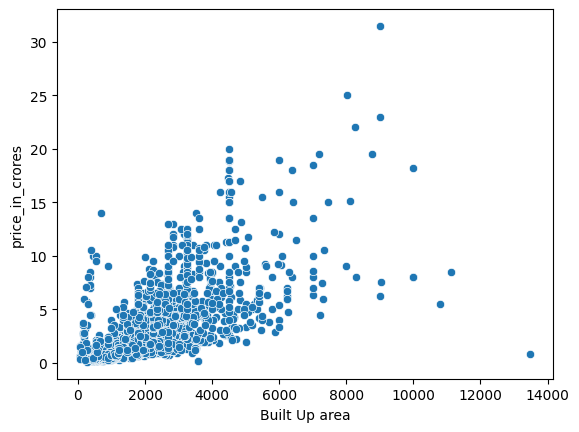

In [70]:
sns.scatterplot(x=df['Built Up area'], y=df['price_in_crores'])

In [69]:
df = df[df['Built Up area']< 20000]

In [71]:
anamoly_df = df[(df['Built Up area']<2000) & (df['price_in_crores']>2.5) ][['price_in_crores', 'area_sqft', 'Built Up area']]

In [74]:
anamoly_df.sample(10)

,price_in_crores,area_sqft,Built Up area
3334,2.80,1557.006840,173.00
691,2.60,2441.000000,1939.03
3486,5.25,1934.984520,1934.98
1024,2.85,1975.000000,1787.00
3520,4.45,1264.743499,1264.74
3145,9.00,8100.000000,900.00
3103,3.71,1872.035523,1872.04
2485,14.00,6300.000000,700.00
2837,5.75,1934.984520,1934.98
3545,3.55,1448.979592,1448.98


In [76]:
anamoly_df['Built Up area'] = anamoly_df['area_sqft']

In [77]:
df.update(anamoly_df)

<Axes: xlabel='Built Up area', ylabel='price_in_crores'>

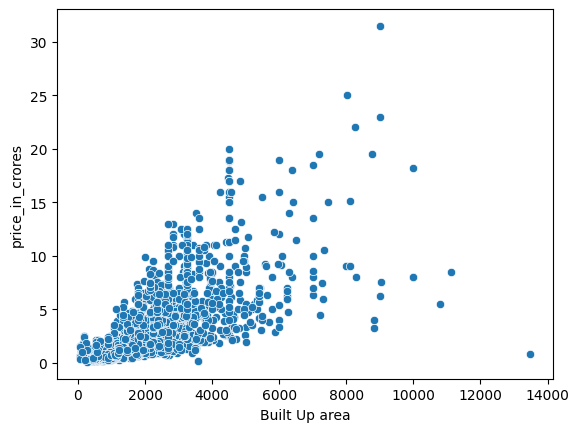

In [78]:
sns.scatterplot(x=df['Built Up area'], y=df['price_in_crores'])

In [79]:
df.head()

,property_type,society,sector,price_in_crores,price_per_sqft,area_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Super Built up area,Built Up area,Carpet area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score,area_room_ratio
0,flat,maa bhagwati residency,sector 7,0.45,5000.000000,900.0,Carpet area: 900 (83.61 sq.m.),2.0,2.0,1,4.0,West,Relatively New,NaN,1000.0,900.0,0,0,0,0,0,1,28,450.0
1,flat,apna enclave,sector 3,0.50,7692.307692,650.0,Carpet area: 650 (60.39 sq.m.),2.0,2.0,1,1.0,West,Old Property,NaN,722.0,650.0,0,0,0,0,0,0,37,325.0
2,flat,tulsiani easy in homes,sohna road,0.40,6722.689076,595.0,Carpet area: 595 (55.28 sq.m.),2.0,2.0,3,12.0,not available,New Property,NaN,661.0,595.0,0,0,0,0,0,1,36,297.5
3,flat,smart world orchard,sector 61,1.47,12250.000000,1200.0,Carpet area: 1200 (111.48 sq.m.),2.0,2.0,2,2.0,not available,Undefined,NaN,1333.0,1200.0,0,0,0,0,0,1,76,600.0
4,flat,parkwood westend,sector 92,0.70,5204.460967,1345.0,Super Built up area 1345(124.95 sq.m.),2.0,2.0,3,5.0,not available,Under Construction,1345.0,1217.0,NaN,0,0,0,0,0,1,0,672.5


In [80]:
df.drop(columns=['area_sqft','areaWithType','Super Built up area','Carpet area','area_room_ratio'],inplace=True)

In [81]:
df.head()

,property_type,society,sector,price_in_crores,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built Up area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.000000,2.0,2.0,1,4.0,West,Relatively New,1000.0,0,0,0,0,0,1,28
1,flat,apna enclave,sector 3,0.50,7692.307692,2.0,2.0,1,1.0,West,Old Property,722.0,0,0,0,0,0,0,37
2,flat,tulsiani easy in homes,sohna road,0.40,6722.689076,2.0,2.0,3,12.0,not available,New Property,661.0,0,0,0,0,0,1,36
3,flat,smart world orchard,sector 61,1.47,12250.000000,2.0,2.0,2,2.0,not available,Undefined,1333.0,0,0,0,0,0,1,76
4,flat,parkwood westend,sector 92,0.70,5204.460967,2.0,2.0,3,5.0,not available,Under Construction,1217.0,0,0,0,0,0,1,0


In [82]:
df.isnull().sum()

property_type        0
society              1
sector               0
price_in_crores      0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum            17
facing             226
agePossession        0
Built Up area        0
study room           0
store room           0
Pooja Room           0
servant room         0
Others               0
furnishing_type      0
luxury_score         0
dtype: int64

In [83]:
## Society

In [84]:
df[df['society'].isnull()]

,property_type,society,sector,price_in_crores,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built Up area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score
2572,flat,NaN,sector 78,0.6,3692.307692,2.0,2.0,0,NaN,not available,Under Construction,1625.0,0,0,0,0,0,1,0


In [85]:
df.dropna(subset=['society'], inplace=True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3547 entries, 0 to 3552
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3547 non-null   object 
 1   society          3547 non-null   object 
 2   sector           3547 non-null   object 
 3   price_in_crores  3547 non-null   float64
 4   price_per_sqft   3547 non-null   float64
 5   bedRoom          3547 non-null   float64
 6   bathroom         3547 non-null   float64
 7   balcony          3547 non-null   object 
 8   floorNum         3531 non-null   float64
 9   facing           3321 non-null   object 
 10  agePossession    3547 non-null   object 
 11  Built Up area    3547 non-null   float64
 12  study room       3547 non-null   int64  
 13  store room       3547 non-null   int64  
 14  Pooja Room       3547 non-null   int64  
 15  servant room     3547 non-null   int64  
 16  Others           3547 non-null   int64  
 17  furnishing_type  35

In [87]:
df.isnull().sum()

property_type        0
society              0
sector               0
price_in_crores      0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum            16
facing             226
agePossession        0
Built Up area        0
study room           0
store room           0
Pooja Room           0
servant room         0
Others               0
furnishing_type      0
luxury_score         0
dtype: int64

In [88]:
## floorNum


In [89]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price_in_crores,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,Built Up area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score
169,flat,experion heartsong,dwarka expressway,1.08,6150.341686,3.0,3.0,0,NaN,not available,Under Construction,1758.000000,0,0,0,0,0,1,0
2820,house,Vipul Tatvam Villa,sector 48,8.50,26235.000000,4.0,4.0,2,NaN,East,Moderately Old,3239.950000,0,1,0,1,0,1,88
2839,house,independent,sector 2,5.60,17284.000000,8.0,6.0,3+,NaN,South-West,Moderately Old,3239.990000,1,1,0,1,0,1,0
2910,house,independent,sector 24,1.45,2983.555556,3.0,3.0,1,NaN,NaN,Old Property,540.000000,0,0,0,0,0,1,9
2941,house,independent,sector 3,1.50,10288.000000,3.0,3.0,0,NaN,NaN,Old Property,1458.010000,0,0,0,0,0,1,0
2954,house,independent,sector 4,4.12,8889.000000,2.0,1.0,3+,NaN,NaN,Moderately Old,4634.940000,0,0,0,0,0,1,0
3000,house,independent,sector 4,0.65,11111.000000,4.0,2.0,2,NaN,NaN,Moderately Old,585.010000,0,0,0,0,0,1,0
3015,house,Ansal Sushant Lok Plots,sector 43,3.30,26570.000000,1.0,1.0,0,NaN,NaN,Under Construction,1242.002258,0,0,0,0,0,1,0
3133,house,jacob pura,sector 12,0.35,9722.000000,2.0,1.0,0,NaN,NaN,Old Property,360.010000,0,0,0,0,0,1,0
3157,house,independent,sector 25,13.00,45710.000000,6.0,8.0,3+,NaN,NaN,Relatively New,2844.020000,1,1,0,1,0,2,0


In [90]:
df[df['property_type']=='house']['floorNum'].median()

2.0

In [91]:
df['floorNum'].fillna(2.0, inplace=True)

C:\Users\deepu\AppData\Local\Temp\ipykernel_46616\721975971.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0, inplace=True)


In [92]:
df.isnull().sum()

property_type        0
society              0
sector               0
price_in_crores      0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum             0
facing             226
agePossession        0
Built Up area        0
study room           0
store room           0
Pooja Room           0
servant room         0
Others               0
furnishing_type      0
luxury_score         0
dtype: int64

In [93]:
## Facing

<Axes: ylabel='count'>

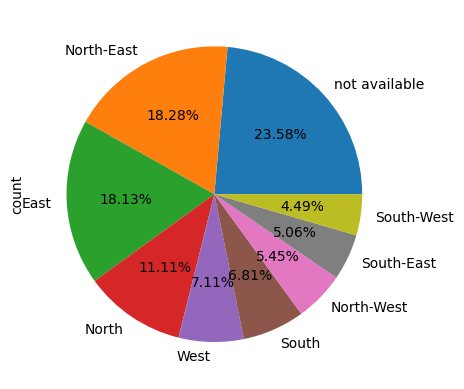

In [94]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [96]:
df.drop('facing',axis=1, inplace=True)

In [97]:
df.head()

,property_type,society,sector,price_in_crores,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,Built Up area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.000000,2.0,2.0,1,4.0,Relatively New,1000.0,0,0,0,0,0,1,28
1,flat,apna enclave,sector 3,0.50,7692.307692,2.0,2.0,1,1.0,Old Property,722.0,0,0,0,0,0,0,37
2,flat,tulsiani easy in homes,sohna road,0.40,6722.689076,2.0,2.0,3,12.0,New Property,661.0,0,0,0,0,0,1,36
3,flat,smart world orchard,sector 61,1.47,12250.000000,2.0,2.0,2,2.0,Undefined,1333.0,0,0,0,0,0,1,76
4,flat,parkwood westend,sector 92,0.70,5204.460967,2.0,2.0,3,5.0,Under Construction,1217.0,0,0,0,0,0,1,0


In [98]:
## agePossession

In [99]:
df['agePossession'].value_counts()

agePossession
Relatively New        1604
New Property           556
Moderately Old         542
Undefined              430
Old Property           292
Under Construction     123
Name: count, dtype: int64

In [101]:
df[df['agePossession']=='Undefined']

,property_type,society,sector,price_in_crores,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,Built Up area,study room,store room,Pooja Room,servant room,Others,furnishing_type,luxury_score
3,flat,smart world orchard,sector 61,1.47,12250.000000,2.0,2.0,2,2.0,Undefined,1333.000000,0,0,0,0,0,1,76
5,flat,signature global infinity mall,sector 36,0.41,6269.113150,2.0,2.0,3,3.0,Undefined,654.000000,0,0,0,0,0,1,0
9,flat,raheja revanta,sector 78,4.75,16885.886953,3.0,3.0,2,31.0,Undefined,2813.000000,0,0,0,0,0,1,100
10,flat,signature global city 81,sector 81,0.96,9766.022380,2.0,2.0,2,1.0,Undefined,1194.000000,0,0,0,0,0,1,49
15,flat,sobha city,sector 108,3.95,16858.728126,4.0,5.0,3,25.0,Undefined,2343.000000,0,0,0,0,0,1,59
16,flat,senate court,sector 62,0.90,14084.507042,1.0,1.0,0,0.0,Undefined,639.000000,0,0,0,0,0,1,0
17,flat,shapoorji pallonji joyville gurugram,sector 102,1.05,11475.409836,2.0,2.0,2,0.0,Undefined,1017.000000,0,0,0,0,0,1,49
19,flat,smart world gems,sector 89,1.01,9156.844968,2.0,2.0,2,4.0,Undefined,1226.000000,0,0,0,0,0,1,38
24,flat,the serenas,sector 36,0.42,7909.604520,2.0,2.0,1,3.0,Undefined,590.000000,0,0,0,0,0,1,0
25,flat,m3m golfestate,sector 65,6.15,18330.849478,3.0,4.0,2,20.0,Undefined,3355.000000,0,0,0,0,0,1,34


In [102]:
df['agePossession'].mode()

0    Relatively New
Name: agePossession, dtype: object

In [103]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type']==row['property_type'])]['agePossession'].mode()
        # if mode_value is empty ( no mode found), return NaN, otherwise return he mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else :
            return np.nan
    else:
        return row['agePossession']

In [104]:
df['agePossession'] = df.apply(mode_based_imputation, axis=1)

In [105]:
df.agePossession.value_counts()

agePossession
Relatively New        1784
New Property           628
Moderately Old         585
Old Property           326
Under Construction     125
Undefined               99
Name: count, dtype: int64

In [108]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # if mode_value is empty ( no mode found), return NaN, otherwise return he mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else :
            return np.nan
    else:
        return row['agePossession']

In [111]:
df['agePossession'] = df.apply(mode_based_imputation2, axis=1)

In [112]:
df.agePossession.value_counts()

agePossession
Relatively New        1813
New Property           654
Moderately Old         591
Old Property           326
Under Construction     125
Undefined               38
Name: count, dtype: int64

In [114]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type']==row['property_type'])]['agePossession'].mode()
        # if mode_value is empty ( no mode found), return NaN, otherwise return he mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else :
            return np.nan
    else:
        return row['agePossession']

In [115]:
df['agePossession'] = df.apply(mode_based_imputation3, axis=1)

In [116]:
df.agePossession.value_counts()

agePossession
Relatively New        1832
New Property           654
Moderately Old         610
Old Property           326
Under Construction     125
Name: count, dtype: int64

In [117]:
df.isnull().sum()

property_type      0
society            0
sector             0
price_in_crores    0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
Built Up area      0
study room         0
store room         0
Pooja Room         0
servant room       0
Others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [118]:
df.to_csv('gurgaonPropertyMissingValueImputation.csv',index=False)